# Data Extraction
### Get names of the profiles from the html files

In [125]:
from bs4 import BeautifulSoup
from os import listdir
from os.path import isfile, join
import pdb
import matplotlib.pyplot as plt
%matplotlib inline

In [200]:
#files = ['00006.html', '05111108.html', '120394.html', '1bettyevans.html']
html_file = 'data/2015-05-26-Washington/120394.html'
with open(html_file) as f:
    s = str(f.readlines())
soup = BeautifulSoup(s, 'html.parser')
#print(soup.prettify())
# print soup.title
temp = soup.find('div', {'class': 'summary'})
t = ''
for string in temp.stripped_strings:
    t = t + string
    print(repr(string))
    print t
# print temp
# print temp.get_text()


u'A detail and results oriented professional with over 20 years progressive experience in successfully designing, implementing and modifying quality software. Experienced in application design, coding, testing and implementation for large and small-scale projects. Skilled in creating effective solutions involving customers, management and teams. Commended for my teamwork, flexibility and self-motivated attitudes. Interested in moving into project management.'
A detail and results oriented professional with over 20 years progressive experience in successfully designing, implementing and modifying quality software. Experienced in application design, coding, testing and implementation for large and small-scale projects. Skilled in creating effective solutions involving customers, management and teams. Commended for my teamwork, flexibility and self-motivated attitudes. Interested in moving into project management.
u"\\n', '"
A detail and results oriented professional with over 20 years pr

In [ ]:
#huskies.py: loop through the files in the directory and extract the name
'''
INPUT: a directory of html files, each file corresponding to a LinkedIn profile
OUTPUT: Full Name for each of the profile in a csv file. If there is no name, "NA" is returned
'''
my_path = '/Users/lekha/galvanize/capstone/prelims/huskies/data/2015-05-26-Washington/'
all_files = [f for f in listdir(my_path) if isfile(join(my_path, f))]
names= []

#files = ['00006.html', '05111108.html', '120394.html', '1bettyevans.html']

files = all_files[1001:] #UPDATE after the names are extracted. testing in chunks.

#pdb.set_trace()
for html_file in files:
    with open(html_file) as f:
        s = str(f.readlines())
        soup = BeautifulSoup(s, 'html.parser')
        full_name = soup.find('span', {'class': 'full-name'})
        if full_name:
            full_name = full_name.get_text()
            names.append(full_name)
        else:
            full_name = "NA"

name_file = '/Users/lekha/galvanize/capstone/prelims/huskies/data/2015-05-26-Washington/names.csv'

with open(name_file, 'wb') as fp:
    for name in names:
        fp.write(name)
        fp.write(",")



####  Notes:
####  Need to add the profile id to the extraction to be able to match the results back to the original profile.


# Very Basic Data Cleaning

In [3]:
cd ..

/Users/lekha/galvanize/capstone/prelims/huskies


In [53]:
import pandas as pd
import numpy as np

In [66]:
filename = 'data/fnamesall'

namelist = []
with open(filename) as f:
    for line in f:
        n = line.split()[0]
        #f, n = name.split("|")
        #s, summ = summary.split("|")
        namelist.append(n)
    
fnames =  [name.split()[0] for name in namelist]


In [67]:
len(fnames)

17199

In [68]:
fnames_u = set(fnames)

In [69]:
len(fnames_u)

4205

In [207]:
# reading the file data into a data frame
raw_df = pd.DataFrame(list(datadict.iteritems()), columns=['full_name','summary'])


In [209]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 2 columns):
full_name    4 non-null object
summary      4 non-null object
dtypes: object(2)
memory usage: 96.0+ bytes


In [130]:
first_names = []
first_names = [x.split()[0].lower() for x in name_list]

In [102]:
#name_list.remove(name_list[990]) #getting rid of an empty entry at the end

# NLTK

In [34]:
import nltk
from nltk.corpus import names
labeled_names = ([(name, 'male') for name in names.words('male.txt')] +[(name, 'female') for name in names.words('female.txt')])


In [211]:
#Example Code
def gender_features(word):
    return {'last_letter': word[-1]}

featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

classifier.classify(gender_features('Neo'))
classifier.classify(gender_features('Trinity'))
print(nltk.classify.accuracy(classifier, test_set))
classifier.show_most_informative_features(5)


# cfd = nltk.ConditionalFreqDist((fileid, name[-1]) for fileid in names.fileids() for name in names.words(fileid))
# cfd.plot()

0.602
Most Informative Features
             last_letter = u'a'           female : male   =     35.5 : 1.0
             last_letter = u'k'             male : female =     34.1 : 1.0
             last_letter = u'f'             male : female =     15.9 : 1.0
             last_letter = u'p'             male : female =     13.5 : 1.0
             last_letter = u'v'             male : female =     12.7 : 1.0


In [35]:
def gender_features(word):
    return {'last_letter': word[-1]}

In [37]:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]

In [38]:
len(featuresets)

7944

In [185]:
# def gender_features(word):
#     return {'name': word, 'last_letter': word[-1], 'last_2_letters': word[-2:], 'last_is_vowel': (word[-1] in 'aeiou')}

In [186]:
featuresets_train = [(gender_features(n), gender) for (n, gender) in labeled_names]


In [39]:
classifier = nltk.NaiveBayesClassifier.train(featuresets)

In [44]:
fnames_features = [gender_features(x) for x in fnames]

In [42]:
classifier.labels()

['male', 'female']

In [45]:
gender_fnames1 = classifier.classify_many(fnames_features)

In [58]:
x = zip(fnames, gender_fnames1)
with open('gender1000.txt', 'w') as f:
    for line in x:
        name = line[0]
        g = line[1]
        nameg = name + "," + g + "\n"
        f.write(nameg)
        #f.write("\n")

In [59]:
set(x)

{('A', 'female'),
 ('A.', 'female'),
 ('A.J.', 'female'),
 ('ADITYA', 'female'),
 ('AJ', 'female'),
 ('ANAND', 'female'),
 ('Aakash', 'female'),
 ('Aalia', 'female'),
 ('Aania', 'female'),
 ('Aapo', 'male'),
 ('Aaron', 'male'),
 ('Abbas', 'male'),
 ('Abbey', 'female'),
 ('Abbi', 'female'),
 ('Abbigail', 'male'),
 ('Abby', 'female'),
 ('AbdelSalam', 'male'),
 ('Abdelrahman', 'male'),
 ('AbdulFattah', 'female'),
 ('Abdulrahman', 'male'),
 ('Abe', 'female'),
 ('Abenezer', 'male'),
 ('Abha', 'female'),
 ('Abhigyan', 'male'),
 ('Abhimanyu', 'male'),
 ('Abhishek', 'male'),
 ('Abigail', 'male'),
 ('Abilia', 'female'),
 ('Abraham', 'male'),
 ('Abu', 'male'),
 ('Ace', 'female'),
 ('Ada', 'female'),
 ('Adam', 'male'),
 ('Adaora', 'female'),
 ('Addison', 'male'),
 ('Adela', 'female'),
 ('Adele', 'female'),
 ('Adeyemi', 'female'),
 ('Adi', 'female'),
 ('Adina', 'female'),
 ('Aditya', 'female'),
 ('Adolfo', 'male'),
 ('Adrian', 'male'),
 ('Adriana', 'female'),
 ('Adriane', 'female'),
 ('Adrianna', 

In [160]:
letter_freq = df.last_letter.value_counts()
letter_freq.sort_values(ascending=False, inplace=True)


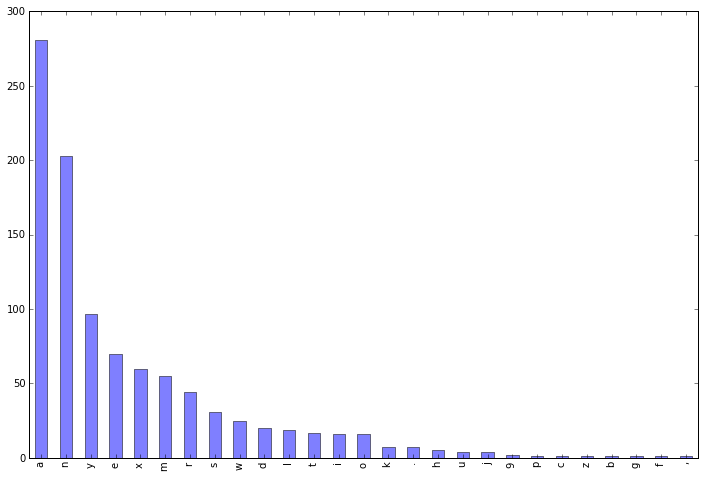

In [161]:
fig, ax = plt.subplots()
letter_freq.plot(ax=ax, kind='bar', alpha = 0.5, figsize=(12,8))